In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from market_profile import MarketProfile
month ="12"
year = 2019
# Load the CSV file
df = pd.read_csv(f'./BTCUSDT_DATA/BTCUSDT-15m-{year}-{month}.csv')
#df = pd.read_csv('./BTCUSDT_DATA/BTCUSDT-15m-2019-11.csv')
# Convert Unix time to datetime
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')

# Set the date as the index
#df = df.set_index('open_time')

df.drop(['close_time',  'quote_volume', 'count', 'taker_buy_base_volume', 'taker_buy_quote_volume'], axis=1, inplace=True)
df

,open_time,open,high,low,close,volume
0,2019-12-01 00:00:00,7540.08,7542.65,7503.26,7508.56,0.948456
1,2019-12-01 00:15:00,7510.15,7518.85,7494.43,7497.79,0.848021
2,2019-12-01 00:30:00,7491.96,7518.83,7491.96,7501.28,0.463894
3,2019-12-01 00:45:00,7493.10,7498.73,7470.11,7483.02,1.462350
4,2019-12-01 01:00:00,7484.30,7491.86,7416.86,7429.97,1.693531
...,...,...,...,...,...,...
2971,2019-12-31 22:45:00,7202.16,7202.16,7200.00,7201.17,0.193263
2972,2019-12-31 23:00:00,7204.36,7204.36,7193.37,7194.32,0.599306
2973,2019-12-31 23:15:00,7191.82,7191.82,7191.82,7191.82,0.024816
2974,2019-12-31 23:30:00,7183.56,7183.56,7182.84,7182.84,0.118920


In [20]:
data = df[['open_time', 'volume']]
poc_list = []
POC_hits = 0
for i in range(1, 31):
    #extract time and volume columns
    data = df[['open_time', 'volume']]
    #get rows from 2019-10-01 time 07:00:00 to 2019-10-02 time 09:00:00'
    if i < 8:
        data = data[(data['open_time'] >= f'{year}-{month}-0{i} 07:00:00') & (data['open_time'] <= f'{year}-{month}-0{i+1} 09:00:00')]
    elif i == 9:
        data = data[(data['open_time'] >= f'{year}-{month}-0{i} 07:00:00') & (data['open_time'] <= f'{year}-{month}-{i+1} 09:00:00')]
    else:
        data = data[(data['open_time'] >= f'{year}-{month}-{i} 07:00:00') & (data['open_time'] <= f'{year}-{month}-{i+1} 09:00:00')]
    # Sort DataFrame by volume in descending order
    data.sort_values(by="volume", ascending=False, inplace=True)
    # Calculate total traded volume
    total_volume = data["volume"].sum()

    # Determine 70% of total volume
    value_area_target = total_volume * 0.7

    # Initialize Value Area with POC
    poc = data.iloc[0]
    poc_close = df[df['open_time'] == poc['open_time']]['close'].values[0]
    poc_list.append(poc_close)
    #check if point of control touched within the high and low 
        #get the row  index of df[df['open_time'] == f'2019-10-0{i+1} 09:30:00']
    if i<8:
        index = df[df['open_time'] == f'{year}-{month}-0{i+1} 09:30:00'].index[0]
    else:
        index = df[df['open_time'] == f'{year}-{month}-{i+1} 09:30:00'].index[0]
    for x in range(0, 36):
        temp_open = df.iloc[index + x]['high']
        temp_close = df.iloc[index + x]['low']
        if poc_close >= temp_close and poc_close <= temp_open:
            POC_hits += 1
            #print the date and time of the poc hit
            print(f"poc hit at {df.iloc[index + x]['open_time']}, poc value: {poc_close}, high: {temp_open}, low: {temp_close}")
            break
print(f"total hit:{POC_hits}\n total pocs:{len(poc_list)}")

poc hit at 2019-12-03 15:30:00, poc value: 7348.51, high: 7352.74, low: 7338.32
poc hit at 2019-12-06 09:30:00, poc value: 7349.45, high: 7444.22, low: 7336.38
poc hit at 2019-12-07 10:00:00, poc value: 7478.29, high: 7500.74, low: 7472.23
poc hit at 2019-12-09 10:45:00, poc value: 7478.99, high: 7486.94, low: 7476.05
poc hit at 2019-12-16 14:00:00, poc value: 7146.01, high: 7152.66, low: 7132.49
poc hit at 2019-12-17 11:45:00, poc value: 6918.96, high: 6937.54, low: 6894.54
poc hit at 2019-12-18 12:00:00, poc value: 6622.49, high: 6627.09, low: 6582.57
poc hit at 2019-12-21 11:45:00, poc value: 7151.83, high: 7154.08, low: 7149.08
poc hit at 2019-12-22 11:45:00, poc value: 7162.94, high: 7174.8, low: 7157.12
poc hit at 2019-12-23 14:00:00, poc value: 7504.93, high: 7538.41, low: 7490.0
poc hit at 2019-12-24 10:15:00, poc value: 7394.97, high: 7405.49, low: 7380.2
poc hit at 2019-12-26 15:45:00, poc value: 7238.08, high: 7242.86, low: 7231.72
poc hit at 2019-12-31 10:30:00, poc value: 

In [3]:
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime

df = df.set_index('open_time')
# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
        x=df.index,
        open=df['open'],
        high=df['high'],
        low=df['low'],
        close=df['close']
    )])

for i in range(1, 31):
        if i < 8:
            x_values = pd.date_range(start=f'{year}-{month}-0{i} 19:00:00', end=f'{year}-{month}-0{i+1} 09:00:00', freq='15min')
        elif i == 9:
            x_values = pd.date_range(start=f'{year}-{month}-0{i} 19:00:00', end=f'{year}-{month}-{i+1} 09:00:00', freq='15min')
        else:
            x_values = pd.date_range(start=f'{year}-{month}-{i} 19:00:00', end=f'{year}-{month}-{i+1} 09:00:00', freq='15min')

        # Add the POC line
        fig.add_trace(go.Scatter(
            x=x_values,
            y=[poc_list[i-1]] * len(x_values),
            mode='lines',
            line=dict(color='red', width=2),
            name=f'Point of Control (${poc_list[i-1]})'
        ))
fig.show()


In [36]:
import numpy as np
import plotly.graph_objs as go
from PyQt5.QtCore import QUrl
from PyQt5.QtWebEngineWidgets import QWebEngineView
from PyQt5.QtWidgets import QApplication

def show_in_window(fig):
    import os
    import plotly.offline as pyo

    # Save the plot to an HTML file
    pyo.plot(fig, filename='plot.html', auto_open=False)

    app = QApplication([])
    web = QWebEngineView()
    file_path = os.path.abspath('plot.html')
    web.load(QUrl.fromLocalFile(file_path))
    web.show()
    app.exec_()

#fig = go.Figure()
#fig.add_scatter(x=np.random.rand(100), y=np.random.rand(100), mode='markers', marker={'size': 30, 'color': np.random.rand(100), 'opacity': 0.6, 'colorscale': 'Viridis'})
show_in_window(fig)

In [3]:
import time
def scenario_one(open_price, value_area_high, value_area_low, current_price, volume_1, volume_2):
    if open_price > value_area_high and current_price >= value_area_high:
        return "Scenario One: Long"
    elif current_price < value_area_high and current_price > value_area_low and volume_1 > volume_2:
        return "scenario One: Long "
    else:
        return "Scenario One: None "

def scenario_two(open_price, value_area_high, current_price, volume):
    if open_price > value_area_high and current_price <= value_area_high:
        return "Scenario Two: Short"
    else:
        return "Scenario Two: None"
def scenario_three(open_price, value_area_low, current_price, volume):
    if open_price < value_area_low and current_price >= value_area_low:
        return "Scenario Three: Long"
    else:
        return "Scenario Three: None"
def scenario_four(open_price, value_area_high, value_area_low, current_price, volume_1, volume_2):
    if open_price < value_area_low and current_price <= value_area_low:
        return "Scenario Four: Short"
    elif open_price < value_area_high and current_price > value_area_low and volume_1 > volume_2:
        return "Scenario Four: Short"
    else:
        return "Scenario Four: None"
def scenario_five(open_price, value_area_high, value_area_low, current_price):

    if open_price > value_area_low and open_price < value_area_high  and current_price > value_area_low and current_price < value_area_high:
        return "Scenario Five: Neutral"
    else:
        return "Scenario Five: None"
def simulate_short_leverage(initial_balance, leverage, buy_position, sell_price, short_long):
    """
    Simulates short selling with leverage.

    Args:
        initial_balance (float): Initial account balance.
        leverage (float): Leverage factor (e.g., 2 for 2x leverage).
        price_change_pct (float): Percentage change in asset price (negative for price decrease).

    Returns:
        float: Final account balance after shorting.
    """
    # Calculate the effective leverage
    leveraged = leverage * initial_balance

    # Calculate the new balance after price change
    if short_long == "Short":
        PnL_short = (buy_position - sell_price)*(leveraged/buy_position)
        print(PnL_short)
        new_balance = initial_balance + PnL_short
    elif short_long == "Long":
        PnL_long = (sell_price - buy_position)*(leveraged/buy_position)
        new_balance = initial_balance + PnL_long
    return new_balance
#extract time and volume columns
data = df[['open_time', 'volume']]
initial_balance = 100  # Initial account balance in USD
leverage = 9         # Leverage ratio (10x)
for i in range(1, 28):
    #extract time and volume columns
    data = df[['open_time', 'volume']]
    #get rows from 2019-10-01 time 07:00:00 to 2019-10-02 time 09:00:00'
    if i < 8:
        data = data[(data['open_time'] >= f'2019-10-0{i} 19:00:00') & (data['open_time'] <= f'2019-10-0{i+1} 09:00:00')]
    elif i == 9:
        data = data[(data['open_time'] >= f'2019-10-0{i} 19:00:00') & (data['open_time'] <= f'2019-10-{i+1} 09:00:00')]
    else:
        data = data[(data['open_time'] >= f'2019-10-{i} 19:00:00') & (data['open_time'] <= f'2019-10-{i+1} 09:00:00')]
    # Sort DataFrame by volume in descending order
    data.sort_values(by="volume", ascending=False, inplace=True)
    # Calculate total traded volume
    total_volume = data["volume"].sum()

    # Determine 70% of total volume
    value_area_target = total_volume * 0.7

    # Initialize Value Area with POC
    poc = data.iloc[0]
    value_area = [poc]
    current_volume = poc["volume"]

    # Iterate above and below POC
    poc_index = data.index.get_loc(poc.name)
    above_index, below_index = poc_index + 1, poc_index - 1

    while current_volume < value_area_target:
        if above_index < len(data):
            above_row = data.iloc[above_index]
        else:
            above_row = None
        
        if below_index >= 0:
            below_row = data.iloc[below_index]
        else:
            below_row = None
        
        if above_row is None and below_row is None:
            break
        
        if not below_row or (above_row and above_row["volume"] > below_row["volume"]):
            value_area.append(above_row)
            current_volume += above_row["volume"]
            above_index += 1
        else:
            value_area.append(below_row)
            current_volume += below_row["volume"]
            below_index -= 1

    # Determine VAH and VAL
    vah = max(value_area, key=lambda x: x["open_time"])
    val = min(value_area, key=lambda x: x["open_time"])

    #print(f"Value Area High (VAH): {vah['open_time']} with volume {vah['volume']}")
    #print(f"Value Area Low (VAL): {val['open_time']} with volume {val['volume']}")
    #print(f"Total Value Area Volume: {current_volume}")
    #print(f"Value Area Target (70% of Total Volume): {value_area_target}")
    #print(f"POC (Point of Control): {poc['open_time']} with volume {poc['volume']}")
    #get closing price for VAH and VAL from the original dataframe
    vah_close = df[df['open_time'] == vah['open_time']]['close'].values[0]
    val_close = df[df['open_time'] == val['open_time']]['close'].values[0]
    #print(f"Value Area High (VAH) close price: {vah_close}")
    #print(f"Value Area Low (VAL) close price: {val_close}")
    #get point of control price from the original dataframe
    poc_close = df[df['open_time'] == poc['open_time']]['close'].values[0]
    #print(f"Point of Control (POC) close price: {poc_close}")
    #get specific open price, volume and current price from specific time
    if i<8:
        open_price = df[df['open_time'] == f'2019-10-0{i+1} 09:00:00']['open'].values[0]
        volume_1 = df[df['open_time'] == f'2019-10-0{i+1} 09:00:00']['volume'].values[0]
        volume_2 = df[df['open_time'] == f'2019-10-0{i+1} 09:30:00']['volume'].values[0]
        current_price = df[df['open_time'] == f'2019-10-0{i+1} 09:30:00']['open'].values[0]
    else:
        open_price = df[df['open_time'] == f'2019-10-{i+1} 09:00:00']['open'].values[0]
        volume_1 = df[df['open_time'] == f'2019-10-{i+1} 09:00:00']['volume'].values[0]
        volume_2 = df[df['open_time'] == f'2019-10-{i+1} 09:30:00']['volume'].values[0]
        current_price = df[df['open_time'] == f'2019-10-{i+1} 09:30:00']['open'].values[0]
    recommendation_1 = scenario_one(open_price , vah_close, val_close, current_price, volume_1,volume_2 )
    recommendation_2 = scenario_two(open_price, vah_close, current_price, volume_1)
    recommendation_3 = scenario_three(open_price, val_close, current_price, volume_1)
    recommendation_4 = scenario_four(open_price, vah_close, val_close, current_price, volume_1, volume_2)
    recommendation_5 = scenario_five(open_price, vah_close, val_close, current_price)
    #get final recommendation based on the 5 scenarios above which is not the string "None"
    final_recommendation = [recommendation_1, recommendation_2, recommendation_3, recommendation_4, recommendation_5]
    #check for each recommendation and get the first one that does not contain the string "None"
    decision = ""
    for recommendation in final_recommendation:
        if "None" not in recommendation:
            print("\n"+recommendation)
            decision = recommendation
            break
    #get the row  index of df[df['open_time'] == f'2019-10-0{i+1} 09:30:00']
    if i<8:
        index = df[df['open_time'] == f'2019-10-0{i+1} 09:30:00'].index[0]
    else:
        index = df[df['open_time'] == f'2019-10-{i+1} 09:30:00'].index[0]
    #do a for loop  getting the open and close prices for the next 20 rows after the index
    btc_price = current_price      # Current BTC price in USD
    for i in range(35):
        temp_open = df.iloc[index + i]['open']
        temp_close = df.iloc[index + i]['close']
        
        if "Short" in decision:
            target_price = current_price*0.998   # Target price to close the position in USD
            if current_price> temp_close or current_price > temp_open:
                print(f"Shorted: WIN, IN:{current_price}, OUT:  open - {temp_open} close-{temp_close}")
                #btc_price is based on either open or close price if either is greater than the target price
                btc_price = temp_open if current_price > temp_open else temp_close
                initial_balance = simulate_short_leverage(initial_balance, leverage, current_price, btc_price, "Short")
                print(f"Ending Balance: {initial_balance}")
                break
            else:
                print(f"Longed: LOSE, IN:{current_price},  OUT:  open - {temp_open} close-{temp_close}")
                stop_loss = current_price*1.05
                btc_price = temp_open if current_price < temp_open else temp_close
                if btc_price >= stop_loss:
                    initial_balance = simulate_short_leverage(initial_balance, leverage, current_price, btc_price, "Short")
                    print(f"Ending Balance: {initial_balance}")
                    break
        elif "Long" in decision:
            if current_price < temp_open or current_price< temp_close:
                print(f"Longed: WIN, IN:{current_price}, OUT:  open - {temp_open} close-{temp_close}")
                btc_price = temp_open if current_price< temp_open else temp_close
                percentage_change = (btc_price - current_price) / current_price
                initial_balance = simulate_short_leverage(initial_balance, leverage, current_price, btc_price, "Long")
                print(f"Ending Balance: {initial_balance}")
                break
            else:
                print(f"Shorted: LOSE, IN:{current_price},  OUT:  open - {temp_open} close-{temp_close}")
                stop_loss = current_price*0.95
                btc_price = temp_open if current_price > temp_open else temp_close
                if btc_price >= stop_loss:
                    percentage_change = (btc_price - current_price) / current_price
                    initial_balance = simulate_short_leverage(initial_balance, leverage, current_price, btc_price, "Long")
                    print(f"Ending Balance: {initial_balance}")
                    break
        if i == 34:
            print(f"Ending Balance: {initial_balance}")




Scenario Four: Short
Shorted: WIN, IN:8238.69, OUT:  open - 8238.69 close-8228.54
1.108792781376611
Ending Balance: 101.10879278137661

Scenario Two: Short
Longed: LOSE, IN:8261.56,  OUT:  open - 8261.56 close-8269.84
Longed: LOSE, IN:8261.56,  OUT:  open - 8267.29 close-8268.18
Longed: LOSE, IN:8261.56,  OUT:  open - 8270.68 close-8269.95
Shorted: WIN, IN:8261.56, OUT:  open - 8262.32 close-8236.97
2.7084941500693076
Ending Balance: 103.81728693144592

Scenario Four: Short
Longed: LOSE, IN:8117.32,  OUT:  open - 8117.32 close-8117.32
Shorted: WIN, IN:8117.32, OUT:  open - 8114.4 close-8121.4
0.336110723805205
Ending Balance: 104.15339765525113

Scenario Four: Short
Longed: LOSE, IN:8086.23,  OUT:  open - 8086.23 close-8089.52
Shorted: WIN, IN:8086.23, OUT:  open - 8094.61 close-8082.86
0.39066073446880245
Ending Balance: 104.54405838971992

Scenario Four: Short
Shorted: WIN, IN:7920.88, OUT:  open - 7920.88 close-7916.47
0.5238500870468744
Ending Balance: 105.0679084767668

Scenario 

In [22]:
import PyQt5

ModuleNotFoundError: No module named 'PyQt5'

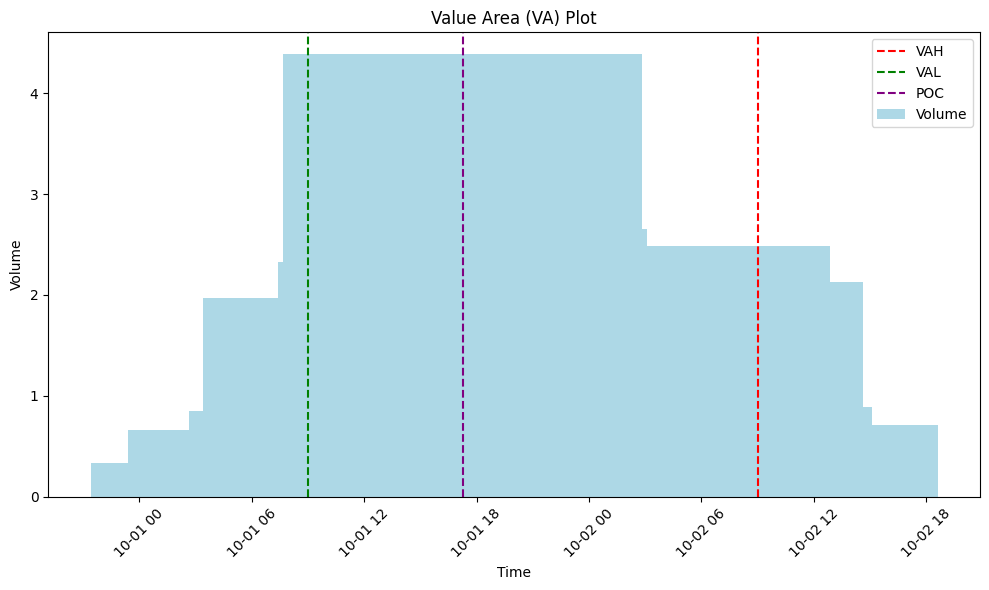

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
# Calculate VAH and VAL (replace with your actual values)
vah_time = vah['open_time']
val_time = val['open_time']
poc_time = poc['open_time']
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(data["open_time"], data["volume"], color="lightblue", label="Volume")
plt.axvline(x=vah_time, color="red", linestyle="--", label="VAH")
plt.axvline(x=val_time, color="green", linestyle="--", label="VAL")
plt.axvline(x=poc_time, color="purple", linestyle="--", label="POC")  # Add POC line

plt.xlabel("Time")
plt.ylabel("Volume")
plt.title("Value Area (VA) Plot")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show or save the plot
plt.show()